In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [62]:
timeseries = pd.read_csv("HU_settlement_tempinfo.csv", sep=";")

sett_types = pd.read_csv("../../data/hun/HU_places_admin_pop_ZIP_latlon.csv",
           sep=',',
           header=0)

df=pd.merge(timeseries, sett_types[["place", "admin municip", "admin county", "population"]], left_on="Settlement", right_on="place")

print("Not found cities :", set(timeseries["Settlement"]).difference(set(df["place"])))

Not found cities : {'Balatonakarattya', 'Magyarország'}


In [63]:
sett_types

,place,KSH code,settlement type,admin county,admin municip,population,zip,latitude,longitude
0,Aba,17376,nagyközség,Fejér,Aba,4619,8127,47.0291,18.5217
1,Abádszalók,12441,város,Jász-Nagykun-Szolnok,Tiszafüred,3922,5241,47.4667,20.6000
2,Abaliget,12548,község,Baranya,Pécs,586,7678,46.1426,18.1168
3,Abasár,24554,község,Heves,Gyöngyös,2498,3261,47.7970,20.0032
4,Abaújalpár,15662,község,Borsod-Abaúj-Zemplén,Encs,76,3882,48.3067,21.2332
...,...,...,...,...,...,...,...,...,...
3172,Zsennye,12292,község,Vas,Szombathely,100,9766,47.1130,16.8152
3173,Zsira,4622,község,Győr-Moson-Sopron,Sopron,782,9476,47.4576,16.6773
3174,Zsombó,17765,község,Csongrád,Szeged,3552,6792,46.3257,19.9746
3175,Zsujta,11022,község,Borsod-Abaúj-Zemplén,Gönc,164,3897,48.5000,21.2833


In [64]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

In [65]:
df

,Settlement,3/4/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,...,1/30/21,1/31/21,2/1/21,2/2/21,2/3/21,Allinfected,place,admin municip,admin county,population
0,Aba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,1.0,3.0,187,Aba,Aba,Fejér,4619
1,Abádszalók,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,127,Abádszalók,Tiszafüred,Jász-Nagykun-Szolnok,3922
2,Abaliget,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,13,Abaliget,Pécs,Baranya,586
3,Abasár,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,165,Abasár,Gyöngyös,Heves,2498
4,Abaújalpár,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2,Abaújalpár,Encs,Borsod-Abaúj-Zemplén,76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3096,Zsennye,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2,Zsennye,Szombathely,Vas,100
3097,Zsira,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,208,Zsira,Sopron,Győr-Moson-Sopron,782
3098,Zsombó,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,98,Zsombó,Szeged,Csongrád,3552
3099,Zsujta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2,Zsujta,Gönc,Borsod-Abaúj-Zemplén,164


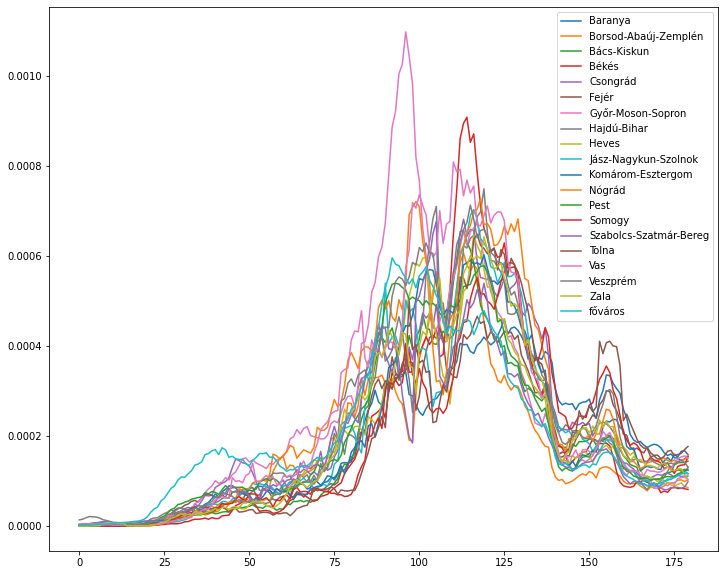

In [72]:
plt.figure(figsize=(12,10))

for county,row in df.groupby("admin county").sum().iterrows():
    key, data = row[150:-2].index, row[150:-2].array/row["population"]
    plt.plot(moving_average(np.array(data), n=7), label = county)

plt.legend()
plt.show()

In [79]:
counties.iloc[:,0]

admin county
Baranya                   0.0
Borsod-Abaúj-Zemplén      0.0
Bács-Kiskun               0.0
Békés                     0.0
Csongrád                  0.0
Fejér                     0.0
Győr-Moson-Sopron         0.0
Hajdú-Bihar               1.0
Heves                     0.0
Jász-Nagykun-Szolnok      0.0
Komárom-Esztergom         0.0
Nógrád                    0.0
Pest                      0.0
Somogy                    0.0
Szabolcs-Szatmár-Bereg    0.0
Tolna                     0.0
Vas                       0.0
Veszprém                  0.0
Zala                      0.0
főváros                   2.0
Name: 3/4/20, dtype: float64

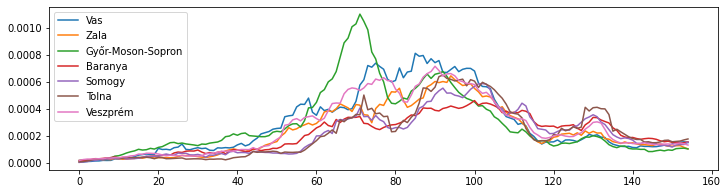

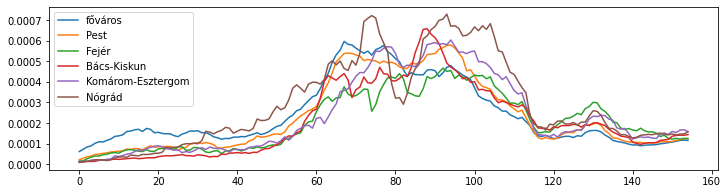

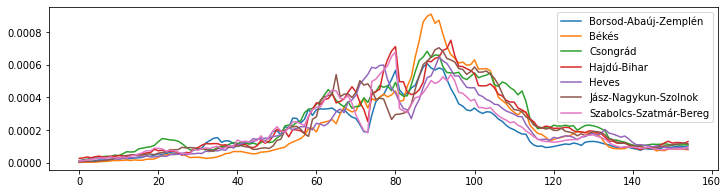

In [85]:
counties = df.groupby("admin county").sum()



for c_names in [["Vas", "Zala", "Győr-Moson-Sopron", "Baranya", "Somogy", "Tolna", "Veszprém"],
                 ["főváros", "Pest", "Fejér", "Bács-Kiskun", "Komárom-Esztergom", "Nógrád"],
                 ["Borsod-Abaúj-Zemplén", "Békés", "Csongrád", "Hajdú-Bihar", "Heves", "Jász-Nagykun-Szolnok", "Szabolcs-Szatmár-Bereg"]
                ]:
    plt.figure(figsize=(12,3))
    for county in c_names:
        row = counties.loc[county]
        key, data = row[175:-2].index, row[175:-2].array/row["population"]
        plt.plot(moving_average(np.array(data), n=7), label = county)

    plt.legend()
    plt.show()

In [127]:
counties["population"]

admin county
Baranya                    385415
Borsod-Abaúj-Zemplén       677280
Bács-Kiskun                522312
Békés                      357740
Csongrád                   419366
Fejér                      425581
Győr-Moson-Sopron          451752
Hajdú-Bihar                537709
Heves                      305336
Jász-Nagykun-Szolnok       383128
Komárom-Esztergom          310200
Nógrád                     198933
Pest                      1245048
Somogy                     314683
Szabolcs-Szatmár-Bereg     552796
Tolna                      229063
Vas                        256189
Veszprém                   353999
Zala                       284906
főváros                   1740041
Name: population, dtype: int64

# Halálozás

In [87]:
m = pd.read_csv("halalozas_megyenkent.csv")

In [90]:
m

,Dátum,Bács-Kiskun,Baranya,Békés,Borsod-Abaúj-Zemplén,Budapest,Csongrád,Fejér,Győr-Moson-Sopron,Hajdú-Bihar,...,Komárom-Esztergom,Nógrád,Pest,Somogy,Szabolcs-Szatmár-Bereg,Tolna,Vas,Veszprém,Zala,Összesen
0,2020-03-31,8.0,20.0,3.0,6.0,215.0,17.0,12.0,25.0,8.0,...,12.0,5.0,89.0,11.0,24.0,7.0,8.0,10.0,6.0,492.0
1,2020-04-01,8.0,19.0,3.0,6.0,232.0,17.0,13.0,26.0,9.0,...,12.0,5.0,98.0,11.0,25.0,7.0,9.0,10.0,7.0,525.0
2,2020-04-02,15.0,19.0,3.0,6.0,243.0,21.0,18.0,28.0,10.0,...,13.0,6.0,122.0,11.0,27.0,7.0,9.0,10.0,7.0,585.0
3,2020-04-03,17.0,21.0,4.0,6.0,261.0,23.0,21.0,28.0,11.0,...,15.0,7.0,124.0,12.0,28.0,7.0,9.0,10.0,8.0,623.0
4,2020-04-04,18.0,21.0,6.0,5.0,291.0,25.0,21.0,33.0,13.0,...,14.0,8.0,134.0,12.0,28.0,7.0,11.0,10.0,10.0,677.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
713,2022-03-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
714,2022-03-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
715,2022-03-16,91922.0,75471.0,53140.0,106553.0,317565.0,77244.0,75770.0,97927.0,96167.0,...,57445.0,40237.0,247676.0,57391.0,98605.0,38630.0,52524.0,72071.0,47927.0,1819264.0
716,2022-03-17,91978.0,75572.0,53204.0,106656.0,317859.0,77304.0,75819.0,98013.0,96244.0,...,57483.0,40266.0,247827.0,57438.0,98716.0,38676.0,52547.0,72212.0,47967.0,1820867.0


In [120]:
b = 175
l = 120
pest = np.array(m["Pest"].array[b+1:b+1+l]-m["Pest"].array[b:b+l])
bk = np.array(m["Bács-Kiskun"].array[b+1:b+1+l]-m["Bács-Kiskun"].array[b:b+l])

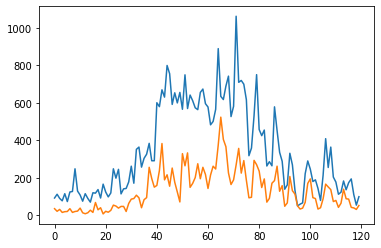

In [121]:
plt.plot(pest)
plt.plot(bk)

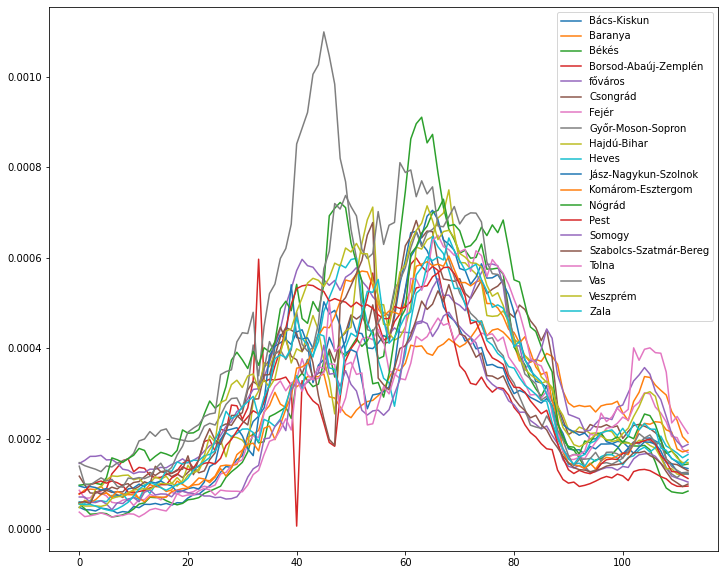

In [141]:
plt.figure(figsize=(12,10))
for megye in m.columns[1:-1]:
    arr = np.array(m[megye].array[b:b+l])
    arr = arr[1:]-arr[:-1]
    if megye == "Budapest":
        megye = "főváros"
    arr /= counties["population"][megye]
    plt.plot(moving_average(arr, 7), label=megye)

plt.legend()

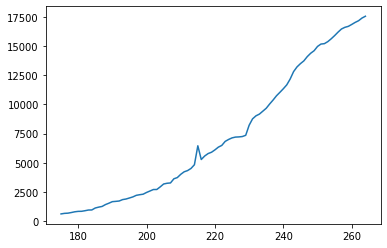

In [133]:
plt.plot(m["Borsod-Abaúj-Zemplén"][175:175+90])

# Contact mtx

In [143]:
def get_inf_curve(filename):
    df = pd.read_csv(filename, sep=',')
    inf_cols = [c for c in df.columns if c[0]=='I']
    Is = df.filter(inf_cols, axis=1)
    return Is.sum(axis=1)

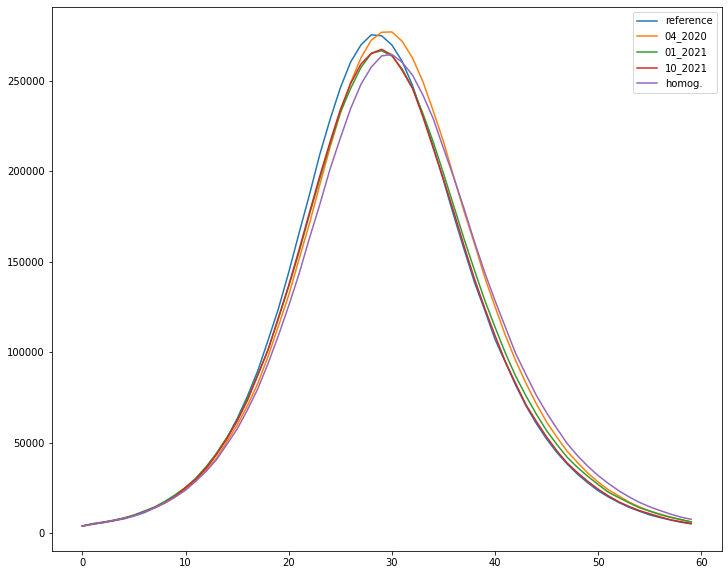

In [151]:
plt.figure(figsize=(12,10))
for i,label in zip(range(5), ["reference", "04_2020", "01_2021", "10_2021", "homog."]):
    plt.plot(get_inf_curve(f"../output/contact_mtx/{i}.txt")[:60], label=label)
    
plt.legend()

In [153]:
df = pd.read_csv(f"../output/contact_mtx/0.txt", sep=',')
df

,I_0_0,R_0_0,I_0_1,R_0_1,I_0_2,R_0_2,I_0_3,R_0_3,I_0_4,R_0_4,...,R_167_11,I_167_12,R_167_12,I_167_13,R_167_13,I_167_14,R_167_14,I_167_15,R_167_15,Unnamed: 5376
0,0,0,1,0,1,0,0,0,1,0,...,0,3,1,4,0,2,0,4,4,NaN
1,0,1,0,0,1,1,1,0,0,1,...,3,3,3,1,3,1,0,3,8,NaN
2,0,1,1,1,1,1,0,0,1,1,...,3,5,5,0,6,1,1,1,10,NaN
3,0,1,1,1,1,1,3,0,0,2,...,6,0,7,2,9,2,2,1,14,NaN
4,1,1,0,2,1,1,2,1,3,2,...,10,2,11,1,11,0,5,2,16,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0,593,0,641,0,705,0,459,0,451,...,3768,0,2837,0,1596,0,1369,0,1596,NaN
146,0,593,0,641,0,705,0,459,0,451,...,3768,0,2837,0,1596,0,1369,0,1596,NaN
147,0,593,0,641,0,705,0,459,0,451,...,3768,0,2837,0,1596,0,1369,0,1596,NaN
148,0,593,0,641,0,705,0,459,0,451,...,3768,0,2837,0,1596,0,1369,0,1596,NaN


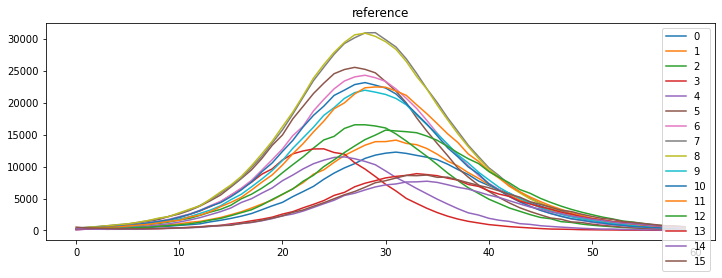

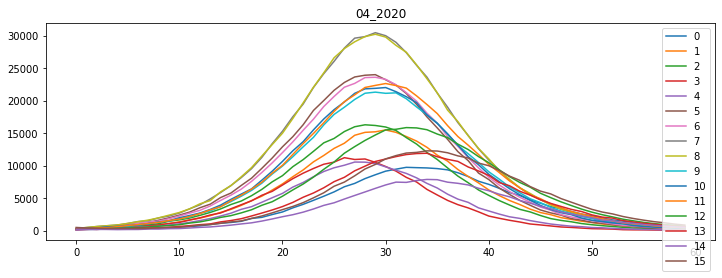

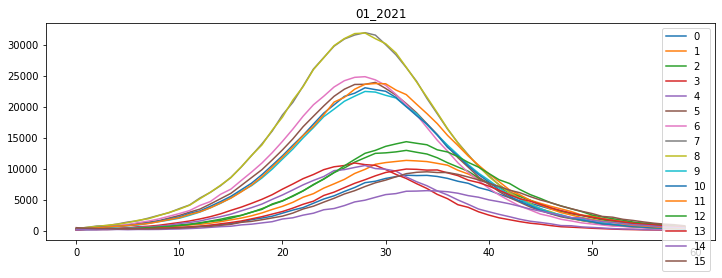

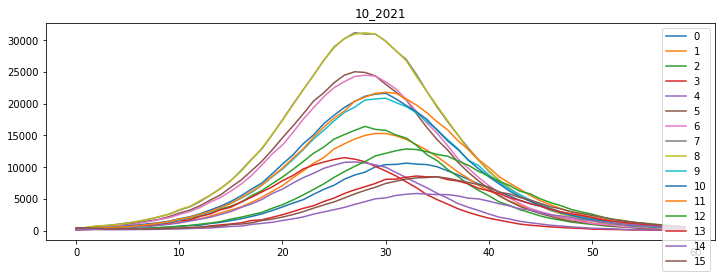

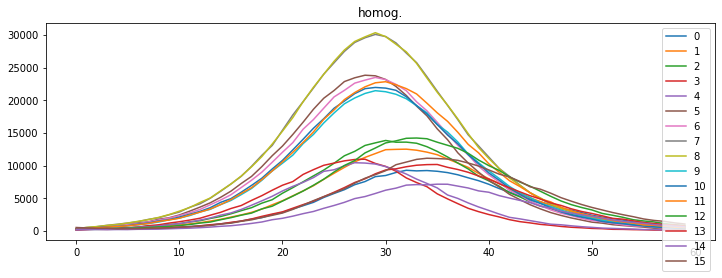

In [162]:
for i,title in enumerate(["reference", "04_2020", "01_2021", "10_2021", "homog."]):
    plt.figure(figsize=(12,4))
    
    df = pd.read_csv(f"../output/contact_mtx/{i}.txt", sep=',');
    inf_cols = [[f"I_{d}_{k}" for d in range(168)] for k in range(16)];
    for j,age in enumerate(inf_cols):
        Is = df.filter(age, axis=1);
        arr = Is.sum(axis=1);
        plt.plot(arr[:60], label=str(j));
    plt.title(title);
    plt.legend();
    plt.show();